__03.09.02. Warm-up House Prices - Task 1__
* Optional.

In [1]:
import pandas as pd

dfrRawData = pd.read_csv('task-1.csv')
print(dfrRawData.shape)
dfrRawData.head()

(50, 2)


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


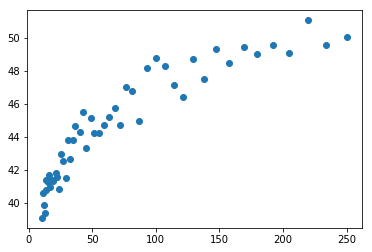

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dfrRawData.x,dfrRawData.y);

__Transformation:__
* Try double log transformation:

In [3]:
import numpy as np
dfrLog10TransformedData = dfrRawData.copy()
dfrLog10TransformedData.x = np.log10(dfrLog10TransformedData.x)
dfrLog10TransformedData.y = np.log10(dfrLog10TransformedData.y)

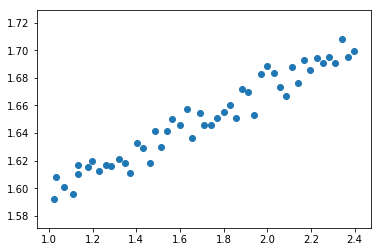

In [4]:
plt.scatter(dfrLog10TransformedData.x,dfrLog10TransformedData.y);

__Observation:__
* When both variables are log-transformed, the relationship becomes linear.

In [5]:
# linear regression on transformed data
from sklearn.linear_model import LinearRegression

# create a linear regression object
lrgLinearRegressionObject = LinearRegression()

# fit the model
intRows = -1 # i.e. infer rows as: rows = values / columns (i.e. 'just as many rows as needed')
intCols = 1
X = dfrLog10TransformedData["x"].values.reshape(intRows, intCols) # reshaping is required
y = dfrLog10TransformedData["y"].values
lrgLinearRegressionObject.fit(X, y)

# print coefficients
fltSlope = lrgLinearRegressionObject.coef_[0]
fltIntercept = lrgLinearRegressionObject.intercept_
print('Slope and intercept:', fltSlope, fltIntercept)

Slope and intercept: 0.07568043166090933 1.521451149648899


In [6]:
# create red line
fltXMin = dfrLog10TransformedData["x"].values.min()
fltXMax = dfrLog10TransformedData["x"].values.max()
intRedLineSteps = 100
afltXTrendLineTransformed = np.linspace(fltXMin, fltXMax, intRedLineSteps) 
afltYTrendLineTransformed = fltSlope * afltXTrendLineTransformed + fltIntercept

# re-transform
afltXTrendLineRaw = 10 ** afltXTrendLineTransformed
afltYTrendLineRaw = 10 ** afltYTrendLineTransformed

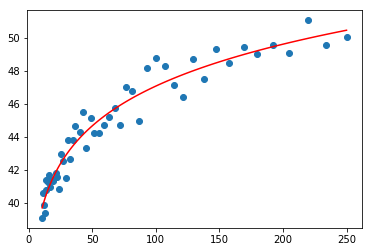

In [7]:
plt.scatter(dfrRawData.x, dfrRawData.y)
plt.plot(afltXTrendLineRaw, afltYTrendLineRaw, "red")
plt.show;

__Residuals:__

In [8]:
# predict Y, re-transformed
afltXTransformed = dfrLog10TransformedData["x"].values
afltYPredictedTransformed = fltSlope * afltXTransformed + fltIntercept
afltYPredictedRaw = 10 ** afltYPredictedTransformed

In [9]:
def RSS(afltTrueY, afltPredictedY): 
    return np.sum(np.square(afltTrueY - afltPredictedY))
def MSE(afltTrueY, afltPredictedY):
    intN = y.shape[0]
    return RSS(afltTrueY, afltPredictedY) / intN
def RMSE(afltTrueY, afltPredictedY):
    return MSE(afltTrueY, afltPredictedY) ** 0.5

print ("Residual Sum of Squares:", RSS(dfrRawData.y, afltYPredictedRaw))
print ("Mean Squared Error:", MSE(dfrRawData.y, afltYPredictedRaw))
print ("Root Mean Squared Error:", RMSE(dfrRawData.y, afltYPredictedRaw))

Residual Sum of Squares: 31.273528234366292
Mean Squared Error: 0.6254705646873259
Root Mean Squared Error: 0.790866970284716


__R squared:__

In [10]:
lrgLinearRegressionObject.score(X, y)

0.9425752811271102

__Discussion:__
* R squared is close to 1.00, thus the model is good.
* The model explains 94% of the variation.
* The typical deviation between true and predicted y values is around 0.8 units.

__03.09.02. Warm-up House Prices - Task 2__
* Optional.

In [11]:
import pandas as pd

dfrRawData = pd.read_csv('task-2.csv')
print(dfrRawData.shape)
dfrRawData.head()

(1000, 4)


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


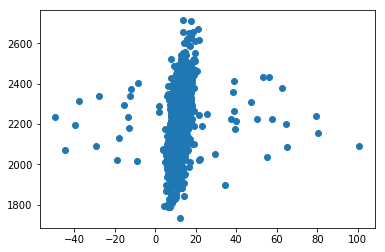

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dfrRawData.x1,dfrRawData.y)
plt.show;

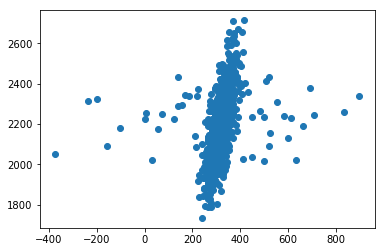

In [13]:
plt.scatter(dfrRawData.x2,dfrRawData.y)
plt.show;

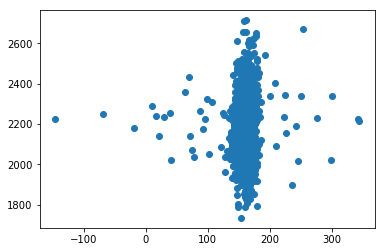

In [14]:
plt.scatter(dfrRawData.x3,dfrRawData.y)
plt.show;

__Outlier situation:__
* All three features seem to contain outliers.
* The target variable (y) seems to be regular.

<function matplotlib.pyplot.show(*args, **kw)>

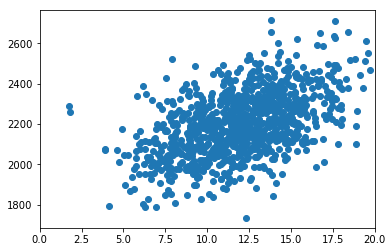

In [15]:
plt.scatter(dfrRawData.x1,dfrRawData.y)
plt.xlim (0,20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

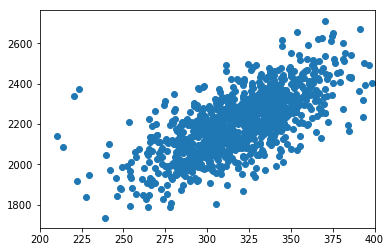

In [16]:
plt.scatter(dfrRawData.x2,dfrRawData.y)
plt.xlim (200,400)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

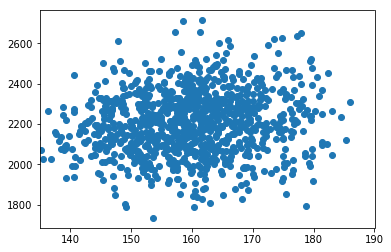

In [17]:
plt.scatter(dfrRawData.x3,dfrRawData.y)
plt.xlim (135,190)
plt.show

__Main relationship:__
* When suppressing the outliers in X, the relationships seems linear for x1 and x2.
* x3 seems not to relate to y.
* All in all, a linear model seems reasonable (even for x3).

__Side note:__
* If using a Jupyter Notebook, make sure to restart your kernel to reset xlim!

__Main tasks:__
* Fit a linear regression with the outliers.
* Fit a __huber regression__ with the outliers.
* Fit a linear regression __without__ the outliers.

In [18]:
# define tasks
llstrTasks = [["linear", "with"], ["huber", "with"], ["linear", "without"]]

In [19]:
# clean data by z-scores
import numpy as np
def CleanedByZScore(dfrDataFrame, strColumn: str, blnOutlierCount = False, blnReplaceOutliers = False, fltStandardDeviations = 3.0):
    # Cleans a dataframe by z-scores on a specific column. 
    # - Optionally returns the number of records lost. 
    # - The number of standard deviations can be adjusted away from the usual factor of 3.
    # - Allow for replacement rather than deletion
    
    # get outliers
    fltMean = dfrDataFrame[strColumn].mean()
    fltStandardDeviation = dfrDataFrame[strColumn].std()
    fltThreshold = fltStandardDeviations * fltStandardDeviation
    srsOutliers = np.abs(dfrDataFrame[strColumn] - fltMean) > fltThreshold
    intOutlierCount = np.sum(srsOutliers)
    
    if blnReplaceOutliers:
        dfrCleaned = dfrDataFrame.copy()
        fltLowBound = fltMean - fltThreshold
        fltHighBound = fltMean + fltThreshold
        srsOutliersLow = dfrDataFrame[strColumn] < fltLowBound # identify
        srsOutliersHigh = dfrDataFrame[strColumn] > fltHighBound
        dfrCleaned.loc[srsOutliersLow, strColumn] = fltLowBound # replace
        dfrCleaned.loc[srsOutliersHigh, strColumn] = fltHighBound
    else:
        dfrCleaned = dfrDataFrame[~srsOutliers]    
        
    # finalize
    if blnOutlierCount:
        return [dfrCleaned, intOutlierCount]
    else:
        return dfrCleaned      

dfrOutliersCleaned = dfrRawData.copy()
for strFeature in ["x1","x2","x3"]:
    dfrOutliersCleaned = CleanedByZScore(dfrOutliersCleaned, strFeature) 
    
print("Shapes changing:", dfrRawData.shape, "-->", dfrOutliersCleaned.shape)    

Shapes changing: (1000, 4) --> (952, 4)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor # SGD = Stochastic Gradient Descent
from sklearn.preprocessing import StandardScaler
# SGDRegressor?

In [21]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [22]:
cfltTypicalGoodEpsilon = 1.35
cfltProportionTrainSet = 0.8
fltProportionTestSet = 1 - cfltProportionTrainSet
intSgdIterations = 1e5

print("GENERAL INFORMATION")
print("Huber epsilon:", cfltTypicalGoodEpsilon)
print("SGD iterations:", intSgdIterations)
print("Train set: {:.1f}%".format(cfltProportionTrainSet * 100))
print("Test set: {:.1f}%".format(fltProportionTestSet * 100))

for strRegressionType, strOutlierType in llstrTasks:
    
    # select data
    if strOutlierType == "with":
        dfrDataUsed = dfrRawData.copy()
    else:
        dfrDataUsed = dfrOutliersCleaned.copy()
    
    # select regression method
    if strRegressionType == "linear":
        strMethod = "squared_loss"
    elif strRegressionType == "huber":
        strMethod = "huber"
    else:
        print("Unknown regression type:", strRegressionType)
        
    # get X and y
    X = dfrDataUsed.drop(["y"], axis=1).values
    y = dfrDataUsed["y"].values
    
    # split data
    x_tr, x_te, y_tr, y_te = train_test_split(X, y, 
          train_size=cfltProportionTrainSet, 
          test_size=fltProportionTestSet,
          random_state=0)  
    
    # scale features as they have different distributions 
    objStandardScaler = StandardScaler()
    x_tr_scaled = objStandardScaler.fit_transform(x_tr)
    x_te_scaled = objStandardScaler.transform(x_te)
    
    # calculate regression
    objSgdRegressor = SGDRegressor(loss=strMethod, penalty='none', 
                                   epsilon=cfltTypicalGoodEpsilon, 
                                   max_iter=intSgdIterations, 
                                   tol=1e-6)    
    objSgdRegressor.fit(x_tr_scaled, y_tr)

    # predict within test set
    y_te_pred = objSgdRegressor.predict(x_te_scaled) 
    
    # calculate the test MAE 
    fltMae = MAE(y_te, y_te_pred)
    
    # feedback
    print("\nRESULTS")
    print("Regression type:", strRegressionType, "regression", strOutlierType, "outliers")
    print("Sample size:", dfrDataUsed.shape[0])
    print("Slopes:", objSgdRegressor.coef_)
    print("Intercept:", objSgdRegressor.intercept_)
    print("MAE: {:.3f}".format(fltMae))   

GENERAL INFORMATION
Huber epsilon: 1.35
SGD iterations: 100000.0
Train set: 80.0%
Test set: 20.0%

RESULTS
Regression type: linear regression with outliers
Sample size: 1000
Slopes: [28.06624588 51.71109338 -7.44964089]
Intercept: [2205.43515795]
MAE: 104.657

RESULTS
Regression type: huber regression with outliers
Sample size: 1000
Slopes: [138.98488053 192.50770136   7.63755774]
Intercept: [2210.37587083]
MAE: 76.348

RESULTS
Regression type: linear regression without outliers
Sample size: 952
Slopes: [ 85.96055984 116.33040644  24.80020206]
Intercept: [2205.35508005]
MAE: 61.029


__Final comments:__
* Scaling is required, at least for normal linear analyses.
* MAE is best with analysis 3: linear regression without outliers.